In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
1e15*np.sin(np.pi/4)

707106781186547.6

In [19]:
from system import *

# creating the star objects

r0 = [1.5e11*np.cos(20*np.pi/180),0,1.5e11*np.sin(20*np.pi/180)] # in units of meters(m), represents the initial position in [x,y]
v0 = [0,2.98e4,0] # in units of meters per second (m/s), represents the initial velocity in [v_x,v_y]

test_star = star(r0,v0) # creates a star object with an initial velocity and position

test_list = [test_star] # system2d class takes in a list of star objects as an argument

test_system = system3d(test_list,2e30) # creates a 2d system object using the 
                                                  # star list and the mass of the central black hole
tf = 365*24*3600 # iterating for 1 year in units of seconds (s)
dt =  tf/1000 # Amount of time between iterations, set such that there ar 1000 iterations
test_system.iterate(tf,dt) # running the iterate method, positions and velocities are sotred within each star object

Data Instantiation Finished


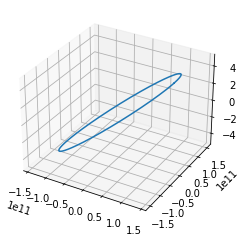

In [20]:
ax = plt.axes(projection='3d')
for i in range(len(test_list)):
    ax.plot(test_list[i].r[:,0],test_list[i].r[:,1],test_list[i].r[:,2])

KeyboardInterrupt: 

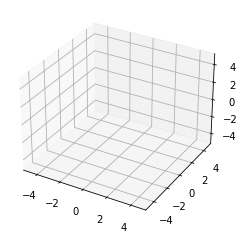

In [66]:
# plotting the 3D model
test_system.plot([-5,5],[-5,5],[-5,5], tf, dt)